In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# sb.pairplot(df)

In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
scaled_x = sc.fit_transform(x)

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [13]:
from sklearn.cluster import KMeans
data = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=1)
    kmeans.fit(scaled_x)
    data.append(kmeans.inertia_)

In [14]:
data

[399.99999999999994,
 269.14250704479224,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.10377812115057,
 44.91118554999014,
 37.15135706793106,
 33.85410621736368,
 29.07617685124427]

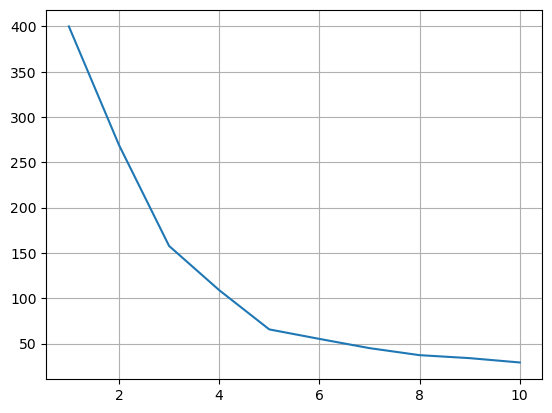

In [15]:
plt.plot(range(1,11),data)
plt.grid()
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5,random_state=1)
label = kmeans.fit_predict(scaled_x)

In [17]:
label

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [18]:
!pip install kneed


In [19]:
from kneed import KneeLocator

In [20]:
k1=KneeLocator(range(1,11),data,curve='convex',direction='decreasing')
k1.elbow

5

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(scaled_x)
    score=silhouette_score(scaled_x,kmeans.labels_)
    silhouette_coefficients.append(score)
    
    

In [23]:
silhouette_coefficients

[0.28793808282017214,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5380630705007141,
 0.5263454490712252,
 0.45644093438859246,
 0.45528744061049026,
 0.44942277625588267]

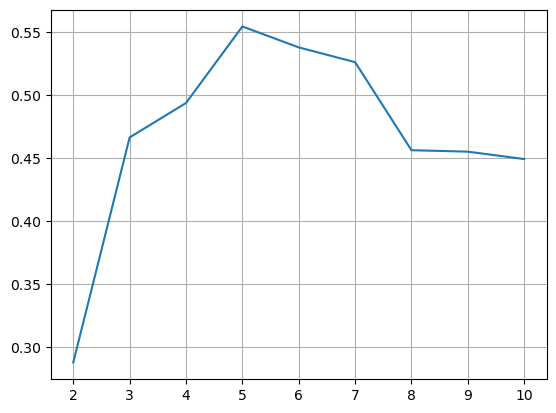

In [24]:
plt.plot(range(2,11),silhouette_coefficients)
plt.grid()
plt.show()

In [25]:
df['YLabel'] = label

In [26]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),YLabel
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [27]:
df['YLabel'].value_counts()

2    81
3    39
1    35
4    23
0    22
Name: YLabel, dtype: int64

In [28]:
scaled_x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [29]:
scaled_x[:,1]

array([-0.43480148,  1.19570407, -1.71591298,  1.04041783, -0.39597992,
        1.00159627, -1.71591298,  1.70038436, -1.83237767,  0.84631002,
       -1.4053405 ,  1.89449216, -1.36651894,  1.04041783, -1.44416206,
        1.11806095, -0.59008772,  0.61338066, -0.82301709,  1.8556706 ,
       -0.59008772,  0.88513158, -1.75473454,  0.88513158, -1.4053405 ,
        1.23452563, -0.7065524 ,  0.41927286, -0.74537397,  1.42863343,
       -1.7935561 ,  0.88513158, -1.7935561 ,  1.62274124, -1.4053405 ,
        1.19570407, -1.28887582,  0.88513158, -0.93948177,  0.96277471,
       -0.59008772,  1.62274124, -0.55126616,  0.41927286, -0.86183865,
        0.5745591 ,  0.18634349, -0.12422899, -0.3183368 , -0.3183368 ,
        0.06987881,  0.38045129,  0.14752193,  0.38045129, -0.20187212,
       -0.35715836, -0.00776431, -0.16305055,  0.03105725, -0.16305055,
        0.22516505,  0.18634349,  0.06987881,  0.34162973,  0.03105725,
        0.34162973, -0.00776431, -0.08540743,  0.34162973, -0.12

In [30]:
kmeans.cluster_centers_

array([[-1.23585672, -0.65714315],
       [ 1.87564575, -1.09476801],
       [-0.49031358,  0.07634907],
       [ 0.65749568,  0.89622346],
       [-1.35366972,  1.15873115],
       [ 0.73205646, -1.42897101],
       [ 2.06703817,  1.0958772 ],
       [ 0.11494451, -0.14086681],
       [ 0.83319623,  1.56235214],
       [-1.37320883, -1.57680239]])

In [31]:
kmeans.cluster_centers_[:,1]

array([-0.65714315, -1.09476801,  0.07634907,  0.89622346,  1.15873115,
       -1.42897101,  1.0958772 , -0.14086681,  1.56235214, -1.57680239])

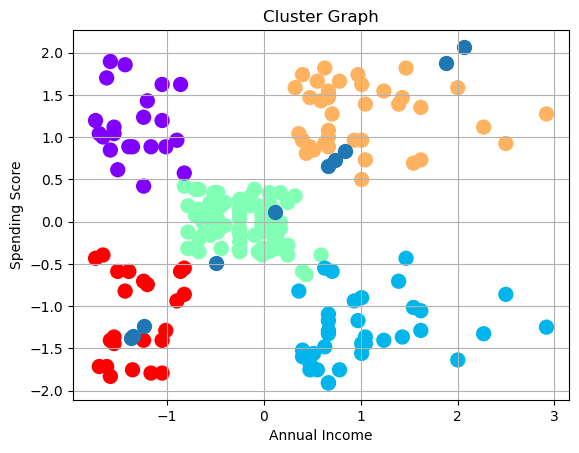

In [32]:
plt.scatter(scaled_x[:,0],scaled_x[:,1],c=label,s=100,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0],cmap='red',s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Cluster Graph')
plt.grid()
plt.show()